In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
#Import the MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels) , (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape


(60000, 28, 28)

In [6]:
len(train_labels)

60000

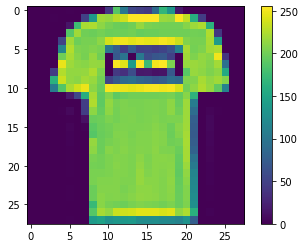

In [20]:
#Preprocess the data

plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
#Scale these values range of 0 and 1 before feeding!!

train_images = train_images / 255.0

test_images = test_images / 255.0

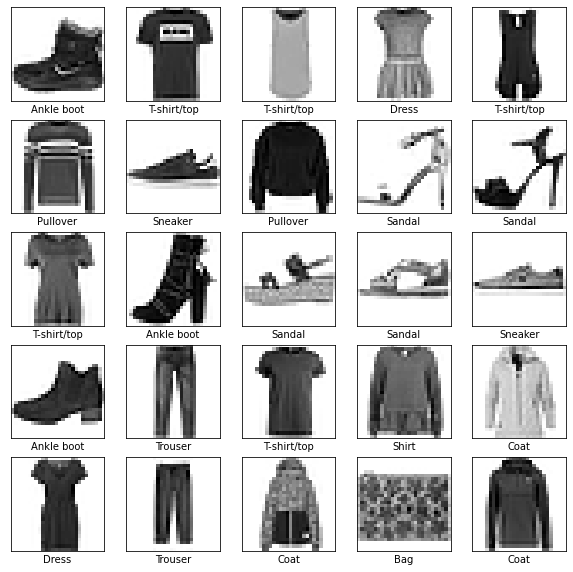

In [30]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary) #cmap -> return without color
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [46]:
#Build the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10),
])

In [47]:
#Compile the model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
#Train the model

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 718us/step - loss: 0.4967 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 1s 682us/step - loss: 0.3708 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 1s 685us/step - loss: 0.3360 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.3120 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 1s 702us/step - loss: 0.2961 - accuracy: 0.8894
Epoch 6/10
1875/1875 [==============================] - 1s 722us/step - loss: 0.2770 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 1s 725us/step - loss: 0.2681 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 1s 697us/step - loss: 0.2537 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 1s 695us/step - loss: 0.2449 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 1s 698u

In [49]:
#Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3499 - accuracy: 0.8805

Test accuracy: 0.8805000185966492


In [50]:
#Make predictions

probability_model = tf.keras.Sequential([model,
                                        tf.keras.layers.Softmax()])

In [51]:
predictions = probability_model.predict(test_images)

In [52]:
predictions[0]

array([9.9782518e-08, 1.6367990e-09, 4.3048079e-08, 1.1833307e-09,
       3.1124756e-08, 1.5109447e-05, 6.9208085e-08, 1.2000918e-03,
       1.4529843e-08, 9.9878460e-01], dtype=float32)

In [53]:
np.argmax(predictions[0])

9

In [58]:
def plot_image(i, predictions_arr , true_label, img):
    true_label , img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_arr)
    
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_arr),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_arr , true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_arr, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_arr)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

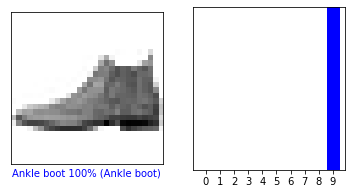

In [59]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

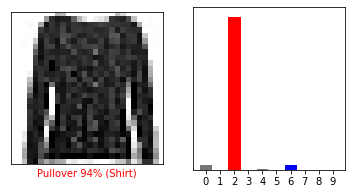

In [63]:
i = 89
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

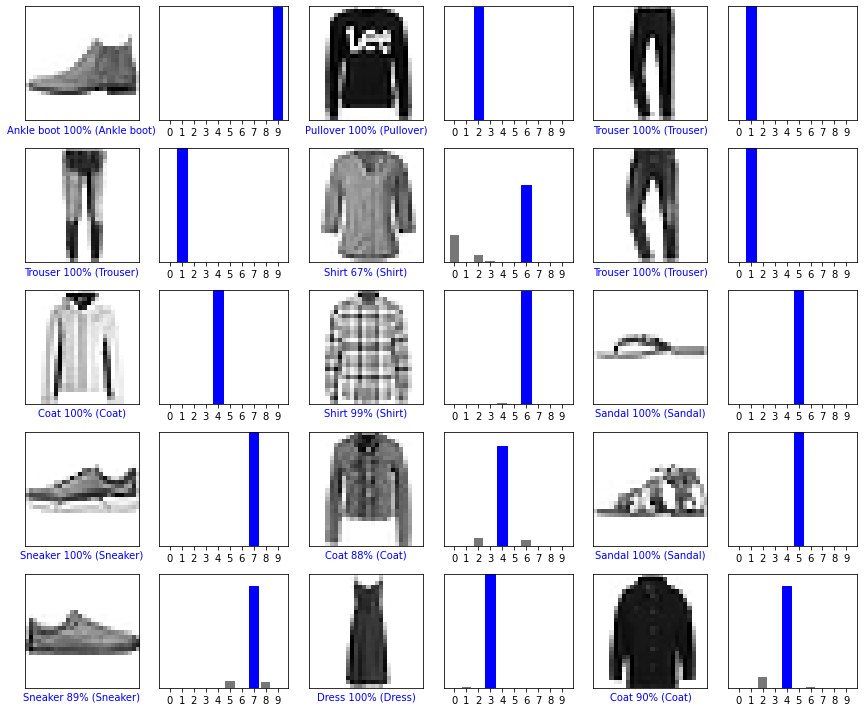

In [67]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()